In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python,r_studio,aws,spark,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,11,1,0,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,23,1,0,0,0,1


In [145]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'aws', 'spark', 'excel'],
      dtype='object')

In [146]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		

In [147]:
#Job title
df['simple_job_title'] = df['Job Title'].apply(title_simplifier)
df.simple_job_title.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: simple_job_title, dtype: int64

In [148]:
#Job seniority 
df['job_level'] = df['Job Title'].apply(seniority)
df.job_level.value_counts()

na        520
senior    220
jr          2
Name: job_level, dtype: int64

In [149]:
#Fix state Los Angeles 
df.job_state.head()

0     NM
1     MD
2     FL
3     WA
4     NY
Name: job_state, dtype: object

In [151]:
#Fix state Los Angeles 
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [152]:
#Job description length 
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['job_desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: job_desc_len, Length: 742, dtype: int64

In [153]:
#Competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [154]:
#hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [120]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [155]:
#remove new line from job title
df['company_text'] = df.company_txt.apply(lambda x: x.replace('\r\n',''))
df['company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [156]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,r_studio,aws,spark,excel,job_desc_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.237197,0.225067,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.425651,0.417908,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [157]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'aws', 'spark', 'excel', 'simple_job_title', 'job_level',
       'job_desc_len', 'num_competitors', 'company_text'],
      dtype='object')

<AxesSubplot:>

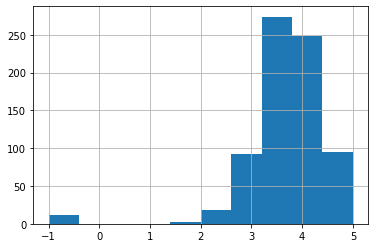

In [158]:
df.Rating.hist()

<AxesSubplot:>

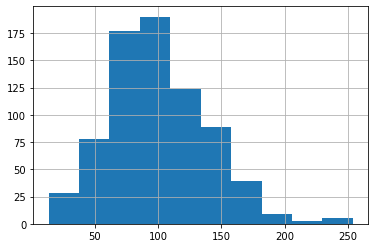

In [159]:
df.avg_salary.hist()

<AxesSubplot:>

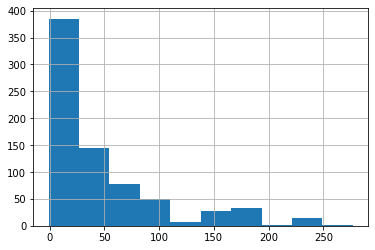

In [160]:
df.age.hist()

<AxesSubplot:>

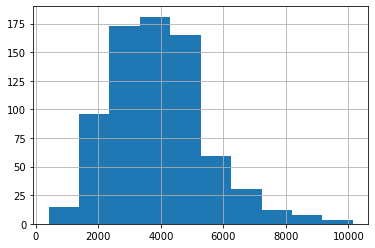

In [161]:
df.job_desc_len.hist()

<AxesSubplot:>

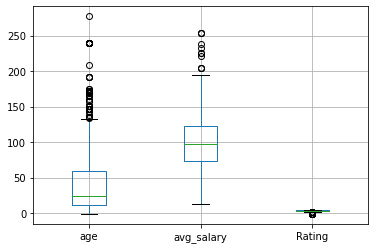

In [162]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

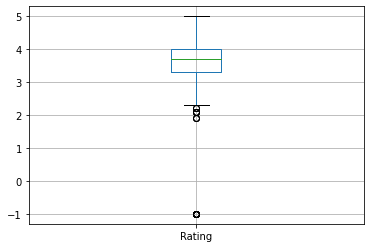

In [163]:
df.boxplot(column = ['Rating'])

In [164]:
corr = df[['age','avg_salary','Rating','job_desc_len','num_competitors']].corr()

<AxesSubplot:>

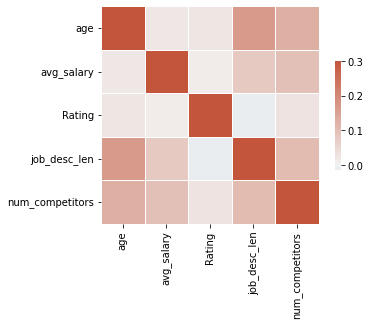

In [165]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [166]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'aws', 'spark', 'excel', 'simple_job_title', 'job_level',
       'job_desc_len', 'num_competitors', 'company_text'],
      dtype='object')

In [168]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'job_state', 'same_state','python', 'r_studio',
       'aws', 'spark', 'excel', 'simple_job_title', 'job_level']]

the graph for Location: total = 200


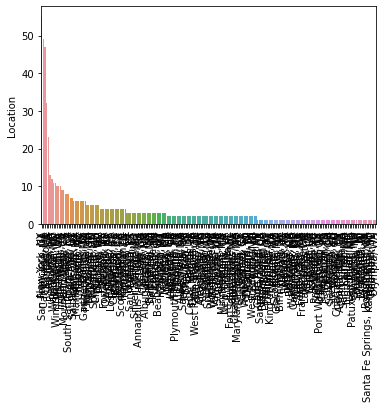

the graph for Headquarters: total = 198


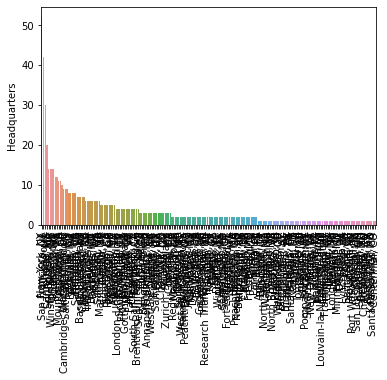

the graph for Size: total = 9


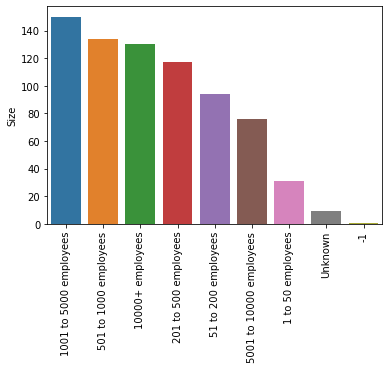

the graph for Type of ownership: total = 11


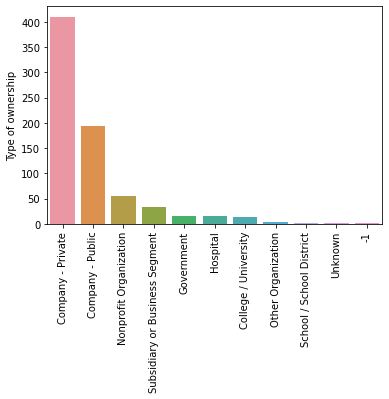

the graph for Industry: total = 60


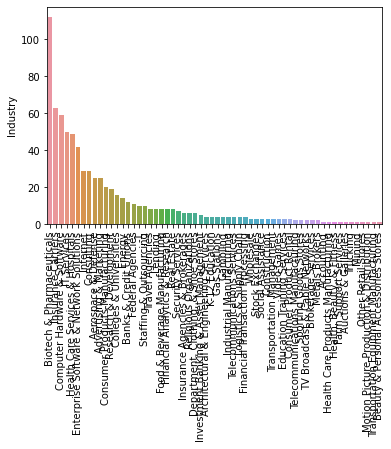

the graph for Sector: total = 25


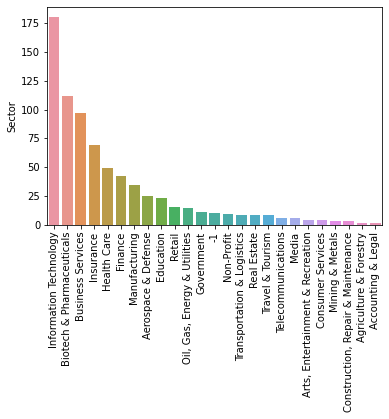

the graph for Revenue: total = 14


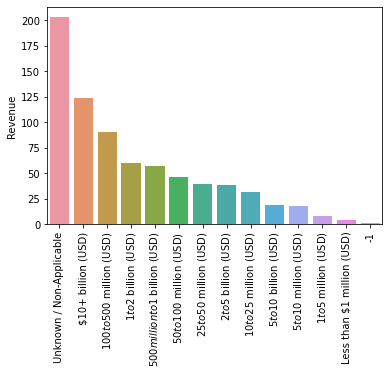

the graph for company_txt: total = 343


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


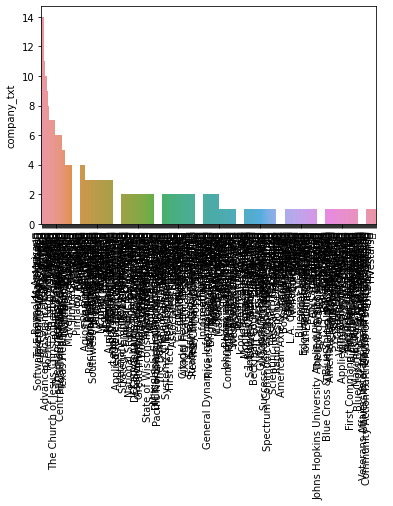

the graph for job_state: total = 37


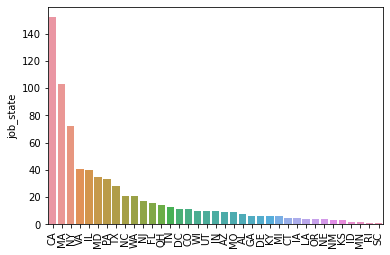

the graph for same_state: total = 2


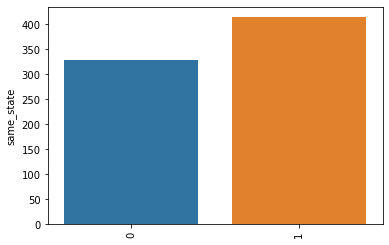

the graph for python: total = 2


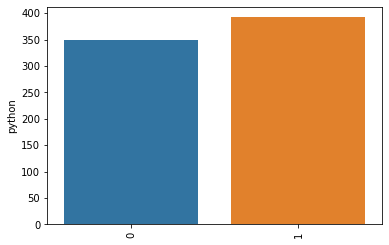

the graph for r_studio: total = 2


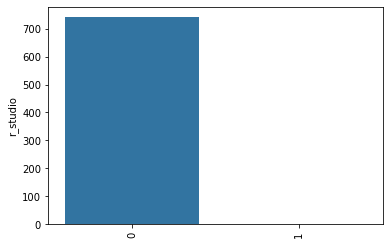

the graph for aws: total = 2


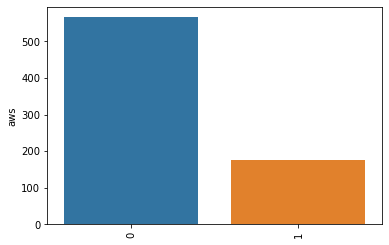

the graph for spark: total = 2


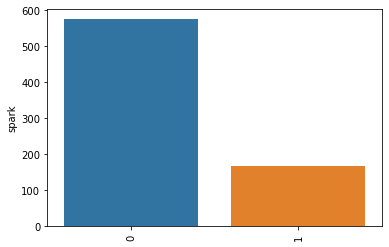

the graph for excel: total = 2


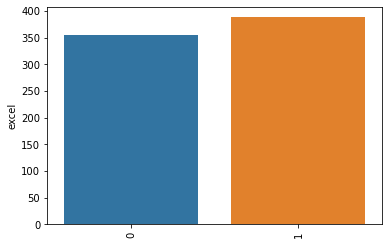

the graph for simple_job_title: total = 7


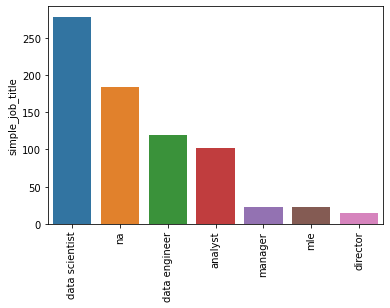

the graph for job_level: total = 3


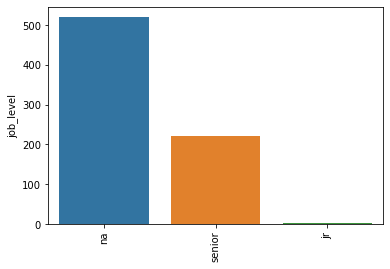

In [169]:
for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print('the graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

the graph for Location: total = 20


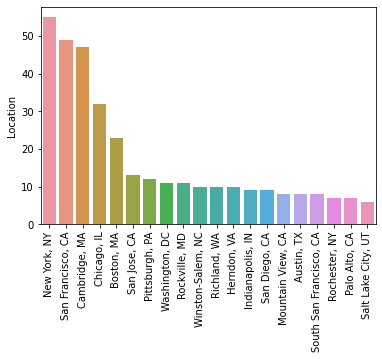

the graph for Headquarters: total = 20


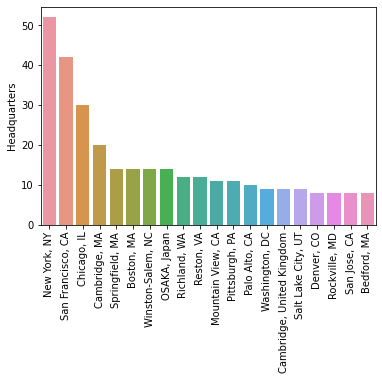

the graph for company_txt: total = 20


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


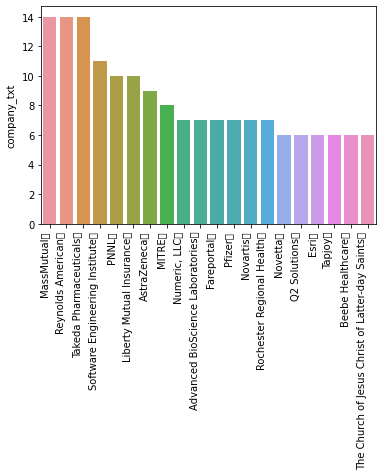

In [171]:
for i in df_cat[['Location','Headquarters','company_txt']]:
    cat_num = df_cat[i].value_counts()[:20]
    print('the graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [172]:
#making the pivot table.
pd.pivot_table(df, index='simple_job_title', values='avg_salary')

,avg_salary
simple_job_title,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [173]:
pd.pivot_table(df, index=['simple_job_title', 'job_level'], values='avg_salary')

avg_salary
simple_job_title job_level            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
manager          na          84.022727
mle              na         119.133333
                 senior     142.071429
na               na          73.988189
                 senior     109.061404

In [181]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state','simple_job_title'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

avg_salary
job_state simple_job_title            
WI        na                         4
          data scientist             3
          analyst                    3
WA        na                         1
          data scientist            17
          analyst                    3
VA        na                         5
          mle                        2
          data scientist            18
          data engineer             10
          analyst                    6
UT        data engineer              3
          analyst                    4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          analyst                    2
SC        na                         1
RI        analyst                    1
PA        manager                    3
          data engineer              1
          data scientist             6
          analyst                    8
          mle                        7
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          analyst                    4
NY        na                        12
          mle                        2
          data scientist            40
          data engineer              4
          analyst                   14
NM        data scientist             3
NJ        data scientist             4
          analyst                    6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          analyst                    2
MN        data engineer              1
          analyst                    1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          analyst                    3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          analyst                    4
LA        analyst                    1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        mle                        3
IN        na                         4
          data scientist             2
          data engineer              4
IL        analyst                    3
          na                         6
          mle                        2
          director                   6
          data scientist            15
          data engineer              8
ID        analyst                    2
IA        analyst                    2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          analyst                    6
DE        na                         6
DC        data scientist             5
          data engineer              4
          analyst                    2
CT        na                         3
          data scientist             2
CO        mle                        1
          data engineer              3
          analyst                    1
          na                         3
          data scientist             3
CA        n

In [183]:
pd.pivot_table(df[df.simple_job_title == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [184]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'aws', 'spark', 'excel', 'simple_job_title', 'job_level',
       'job_desc_len', 'num_competitors', 'company_text'],
      dtype='object')

In [187]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','num_competitors','hourly', 'employer_provided','python', 'r_studio',
       'aws', 'spark', 'excel','Type of ownership','avg_salary']]

In [188]:
for i in df_pivots:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [192]:
pd.pivot_table(df_pivots, index='Revenue', columns ='python', values='avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [202]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [203]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\he\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [205]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\he\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

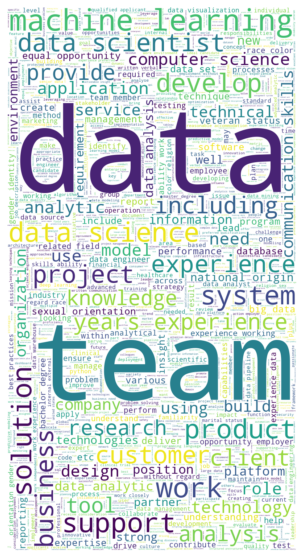

In [209]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [210]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'aws', 'spark', 'excel', 'simple_job_title', 'job_level',
       'job_desc_len', 'num_competitors', 'company_text'],
      dtype='object')

In [211]:
df.to_csv('jobs_final.csv', index=False)

In [213]:
test = pd.read_csv('jobs_final.csv')
test.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'aws', 'spark', 'excel', 'simple_job_title', 'job_level',
       'job_desc_len', 'num_competitors', 'company_text'],
      dtype='object')